In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [2]:
data = np.load('ski_gyro_z_data.npy')
_t_ = data[0,:]
_gyro_ = data[1,:]

In [3]:
t = np.arange(0, np.max(_t_), np.median(np.diff(_t_)))
gyro = np.interp(t, _t_, _gyro_)

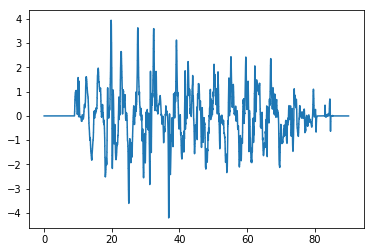

In [4]:
plt.plot(t, gyro)

In [5]:
def get_gamma(dt, freq, timeseries_length=None):
    log_gamma = -5.1 + -1.59*np.log(freq) + -0.72*np.log(dt)
    return np.exp(log_gamma)

In [6]:
figure_layout = 'fig_7_gyro.svg'
cutoff_freq = 2e-1

# Data

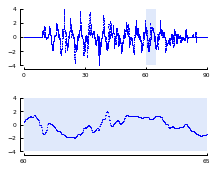

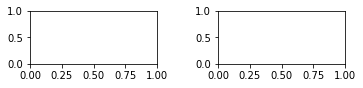

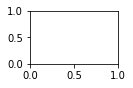

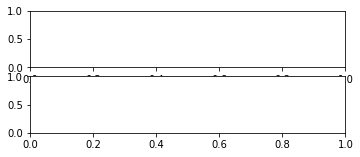

In [7]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('data', 'data')]

ax.plot(t, gyro, '.', color='blue', markersize=1, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.fill_between([60, 65], -4, 4, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(0, 90)
ax.set_ylim(-4, 4)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-4, -2, 0, 2, 4],
                                 xticks = [0, 30, 60, 90],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('data', 'data_zoom')]

ax.plot(t, gyro, '.', color='blue', markersize=1, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.fill_between([60, 65], -4, 4, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(60, 65)
ax.set_ylim(-4, 4)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-4, -2, 0, 2, 4],
                                 xticks = [60, 65],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['data'], 'data', cleartarget=True)
layout.write_svg(figure_layout)

# Spectra

In [8]:
def plot_power_spectra(x, t, cutoff_freq=None, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    ax.set_yscale('log')
    ax.set_xscale('log')
        
    yf = scipy.fftpack.fft(x)
    N = len(t)
    dt = np.mean(np.diff(t))
    xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
    
    P = 2.0/N * np.abs(yf[:N//2])
    ax.plot(xf, P, color='black', zorder=-10)
    
    if cutoff_freq is not None:
        ax.vlines(cutoff_freq, 1e-6, 1e1, color='red')

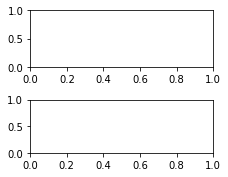

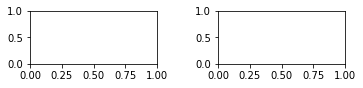

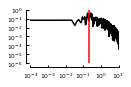

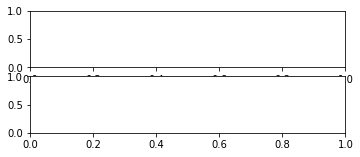

In [9]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('spectra', 'spectra')]
plot_power_spectra(gyro, t, cutoff_freq=cutoff_freq, ax=ax)

ax.set_ylim(1e-6, 1e0)
ax.set_xlim(1e-4, 1e1)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1], 
                                 yticks=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)


layout.append_figure_to_layer(layout.figures['spectra'], 'spectra', cleartarget=True)
layout.write_svg(figure_layout)

In [10]:
dt = np.mean(np.diff(t))
print('dt: ', dt)
idx = np.where( (t>60)*(t<65) )[0]
data_zoom = gyro[idx]

dt:  0.0009849999999005377


In [11]:
tvgamma = get_gamma(dt, cutoff_freq)
print(tvgamma)

11.512943232320442


In [12]:
method = 'savgoldiff'
method_parent = 'linear_model'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](gyro, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

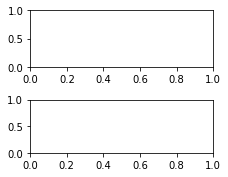

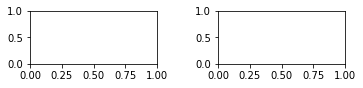

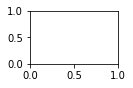

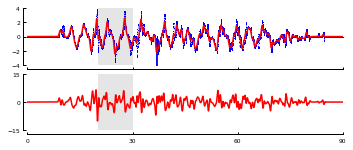

In [13]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])


ax = layout.axes[('smooth', 'pos')]

ax.fill_between([20, 30], -4, 4, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)
ax.plot(t, gyro, '.', color='blue', markersize=1, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')

ax.set_xlim(0, 90)
ax.set_ylim(-4, 4)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-4,-2,0,2,4],
                                 xticks = [0,30,60,90],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})
ax.set_xticklabels([])

ax = layout.axes[('smooth', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([20,30], -15, 15, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)





ax.set_xlim(0, 90)
ax.set_ylim(-10, 10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-15, 0, 15],
                                 xticks = [0,30,60,90],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth'], 'smooth', cleartarget=True)
layout.write_svg(figure_layout)

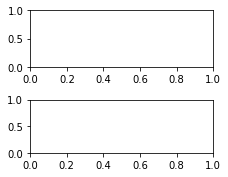

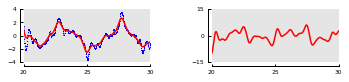

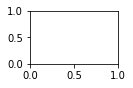

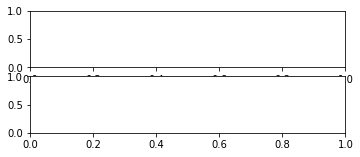

In [14]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('smooth_zoom', 'pos')]

ax.plot(t, gyro, '.', color='blue', markersize=1, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')
ax.fill_between([20,30], -4, 4, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)

ax.set_xlim(20, 30)
ax.set_ylim(-4, 4)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-4, -2, 0, 2, 4],
                                 xticks = [20, 25, 30],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('smooth_zoom', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([20, 30], -15, 15, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)


# other methods
if 0:
    method = 'butterdiff'
    method_parent = 'smooth_finite_difference'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='purple', linewidth=0.3)
    
    method = 'constant_acceleration'
    method_parent = 'kalman_smooth'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='blue', linewidth=0.3)
    
    method = 'jerk'
    method_parent = 'total_variation_regularization'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='green', linewidth=0.3)


ax.set_xlim(20, 30)
ax.set_ylim(-10, 10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-15, 0, 15],
                                 xticks = [20, 25, 30],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth_zoom'], 'smooth_zoom', cleartarget=True)
layout.write_svg(figure_layout)